[View in Colaboratory](https://colab.research.google.com/github/Bing5154/AI4AV/blob/master/Pytorch_Tensor.ipynb)


# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu90' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch  # <Ctrl> / <Shift> + <Return>

In [2]:
torch.__version__

'0.4.0'

## Getting help in Jupyter

In [6]:
torch.sqrt  # <Tab>

<function _VariableFunctions.sqrt>

In [0]:
# What about all `*Tensor`s?
torch.*Tensor?

In [23]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [0]:
# Annotate your functions / classes!
torch.nn.Module?

In [0]:
torch.nn.Module??

## Dropping to Bash: magic!

In [9]:
! ls -lh

total 4.0K
drwxr-xr-x 3 root root 4.0K Jul 16 17:37 datalab


In [11]:
%%bash
for f in $(ls *.*); do
    echo $(wc -l $f)
done

ls: cannot access '*.*': No such file or directory


In [0]:
# Help?
%%bash?

In [0]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [13]:
t = torch.Tensor(2, 3, 4)  #create the tensor with dimension 2x3x4
type(t)
print(t)

tensor([[[ 4.5766e-36,  0.0000e+00,  0.0000e+00,  4.9971e-38],
         [ 3.6653e+14,  4.5659e-41,  1.7896e+14,  4.5659e-41],
         [ 1.4013e-45,  6.7008e-37,  0.0000e+00,  0.0000e+00]],

        [[ 7.2762e-08,  4.5659e-41,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 2.8167e-33,  4.1878e-38, -2.0499e-19,  2.7508e-36]]])


In [17]:
t.size()  #telling you the size (row, column, height) in list

torch.Size([2, 3, 4])

In [14]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [15]:
print(f'point in a {t.numel()} dimensional space')  #the total spaces, volume
print(f'organised in {t.dim()} sub-dimensions')   #how many dimensions

point in a 24 dimensional space
organised in 3 sub-dimensions


In [16]:
t

tensor([[[ 4.5766e-36,  0.0000e+00,  0.0000e+00,  4.9971e-38],
         [ 3.6653e+14,  4.5659e-41,  1.7896e+14,  4.5659e-41],
         [ 1.4013e-45,  6.7008e-37,  0.0000e+00,  0.0000e+00]],

        [[ 7.2762e-08,  4.5659e-41,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 2.8167e-33,  4.1878e-38, -2.0499e-19,  2.7508e-36]]])

In [16]:
# Mind the underscore!
t.random_(10)

tensor([[[ 2.,  3.,  0.,  4.],
         [ 1.,  4.,  1.,  4.],
         [ 8.,  3.,  8.,  5.]],

        [[ 9.,  2.,  7.,  7.],
         [ 4.,  1.,  1.,  2.],
         [ 6.,  4.,  2.,  9.]]])

In [24]:
t

tensor([[[ 7.7316e-37,  0.0000e+00,  8.6881e-44,  0.0000e+00],
         [        nan,  4.5737e-41,  1.7589e+22,  1.2403e-14],
         [ 3.6423e-06,  2.0699e-19,  4.6316e+27,  1.8037e+28]],

        [[ 1.2986e+19,  7.5554e+28,  2.4176e-12,  1.7740e+28],
         [ 7.1447e+31,  7.5769e+23,  4.5444e+30,  4.7429e+30],
         [ 1.8515e+28,  3.4403e+10,  8.0000e+00,  2.7930e+20]]])

In [27]:
r = torch.Tensor(t) #similar to int() in numpy, 
                    #converting t into tensor and call it r
                    #parameter can also contain dimensions
                    #now they are alias to each other
r.resize_(3, 8)
r

tensor([[ 7.7316e-37,  0.0000e+00,  8.6881e-44,  0.0000e+00,         nan,
          4.5737e-41,  1.7589e+22,  1.2403e-14],
        [ 3.6423e-06,  2.0699e-19,  4.6316e+27,  1.8037e+28,  1.2986e+19,
          7.5554e+28,  2.4176e-12,  1.7740e+28],
        [ 7.1447e+31,  7.5769e+23,  4.5444e+30,  4.7429e+30,  1.8515e+28,
          3.4403e+10,  8.0000e+00,  2.7930e+20]])

In [33]:
r.zero_()  #set everything to zero, remember underscore

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [29]:
t 

tensor([[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]]])

In [0]:
# This *is* important, sigh...
s = r.clone()  #r is currently 3 x 8

In [32]:
s.fill_(1)  #a clone of r, all method call should have _
s

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [35]:
r

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Vectors (1D Tensors)

In [36]:
v = torch.Tensor([1, 2, 3, 4]); v  #with bracket, not dimensions, an array

tensor([ 1.,  2.,  3.,  4.])

In [37]:
print(f'dim: {v.dim()}, size: {v.size()[0]}') 

dim: 1, size: 4


In [38]:
w = torch.Tensor([1, 0, 2, 0]); w

tensor([ 1.,  0.,  2.,  0.])

In [40]:
# Element-wise multiplication
v * w

tensor([ 1.,  0.,  6.,  0.])

In [41]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [42]:
x = torch.Tensor(5).random_(10); x   #dimension of 5 with random numbers between 0 to 9

tensor([ 7.,  6.,  9.,  9.,  3.])

In [43]:
print(f'first: {x[0]}, last: {x[-1]}')  #indexing

first: 7.0, last: 3.0


In [44]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([ 6.,  9.])

In [45]:
v

tensor([ 1.,  2.,  3.,  4.])

In [0]:
v = torch.arange(1, 4 + 1); v


 1
 2
 3
 4
[torch.FloatTensor of size 4]

In [0]:
print(v.pow(2), v)


  1
  4
  9
 16
[torch.FloatTensor of size 4]
 
 1
 2
 3
 4
[torch.FloatTensor of size 4]



In [0]:
print(v.pow_(2), v)


  1
  4
  9
 16
[torch.FloatTensor of size 4]
 
  1
  4
  9
 16
[torch.FloatTensor of size 4]



## Matrices (2D Tensors)

In [0]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]]); m


 2  5  3  7
 4  2  1  9
[torch.FloatTensor of size 2x4]

In [0]:
m.dim()

2

In [0]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [0]:
m.numel()

8

In [0]:
m[0][2]

3.0

In [0]:
m[0, 2]

3.0

In [0]:
m[:, 1]


 5
 2
[torch.FloatTensor of size 2]

In [0]:
m[:, [1]]


 5
 2
[torch.FloatTensor of size 2x1]

In [0]:
m[[0], :]


 2  5  3  7
[torch.FloatTensor of size 1x4]

In [0]:
m[0, :]


 2
 5
 3
 7
[torch.FloatTensor of size 4]

In [0]:
v = torch.arange(1, 4 + 1); v


 1
 2
 3
 4
[torch.FloatTensor of size 4]

In [0]:
m @ v


 49
 47
[torch.FloatTensor of size 2]

In [0]:
m[[0], :] @ v


 49
[torch.FloatTensor of size 1]

In [0]:
m[[1], :] @ v


 47
[torch.FloatTensor of size 1]

In [0]:
m + torch.rand(2, 4)


 2.2680  5.3845  3.5066  7.2793
 4.8702  2.2567  1.9085  9.1093
[torch.FloatTensor of size 2x4]

In [0]:
m - torch.rand(2, 4)


 1.6493  4.9247  2.4892  6.3535
 3.9845  1.4249  0.0890  8.8695
[torch.FloatTensor of size 2x4]

In [0]:
m * torch.rand(2, 4)


 1.1733  4.1260  0.1421  1.8981
 3.8840  0.7485  0.8296  8.5378
[torch.FloatTensor of size 2x4]

In [0]:
m / torch.rand(2, 4)


 36.9576  17.7094   8.6183  16.6519
  5.9585   6.3225   2.1091  12.2522
[torch.FloatTensor of size 2x4]

In [0]:
m.t()


 2  4
 5  2
 3  1
 7  9
[torch.FloatTensor of size 4x2]

In [0]:
# Same as
m.transpose(0, 1)


 2  4
 5  2
 3  1
 7  9
[torch.FloatTensor of size 4x2]

## Constructors

In [0]:
torch.arange(3, 8 + 1)


 3
 4
 5
 6
 7
 8
[torch.FloatTensor of size 6]

In [0]:
torch.arange(5.7, -3, -2.1)


 5.7000
 3.6000
 1.5000
-0.6000
-2.7000
[torch.FloatTensor of size 5]

In [0]:
torch.linspace(3, 8, 20).view(1, -1)



Columns 0 to 9 
 3.0000  3.2632  3.5263  3.7895  4.0526  4.3158  4.5789  4.8421  5.1053  5.3684

Columns 10 to 19 
 5.6316  5.8947  6.1579  6.4211  6.6842  6.9474  7.2105  7.4737  7.7368  8.0000
[torch.FloatTensor of size 1x20]

In [0]:
torch.zeros(3, 5)


 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
[torch.FloatTensor of size 3x5]

In [0]:
torch.ones(3, 2, 5)


(0 ,.,.) = 
  1  1  1  1  1
  1  1  1  1  1

(1 ,.,.) = 
  1  1  1  1  1
  1  1  1  1  1

(2 ,.,.) = 
  1  1  1  1  1
  1  1  1  1  1
[torch.FloatTensor of size 3x2x5]

In [0]:
torch.eye(3)


 1  0  0
 0  1  0
 0  0  1
[torch.FloatTensor of size 3x3]

In [0]:
# Pretty plotting config
%run ~/Dropbox/NYU/Work/plot_conf.py

In [0]:
# Pretty plotting config
%run ~/Dropbox/NYU/Work/plot_conf.py

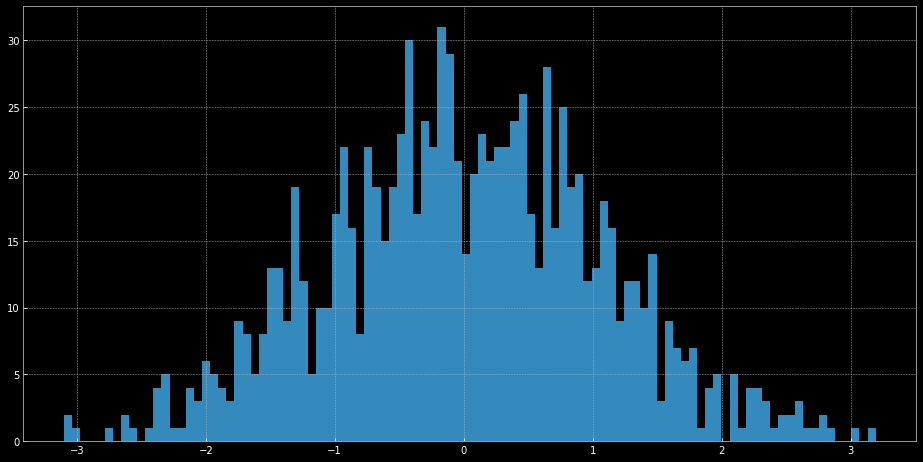

In [0]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

In [0]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

In [0]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [0]:
torch.*Tensor?

In [0]:
m


 2  5  3  7
 4  2  1  9
[torch.FloatTensor of size 2x4]

In [0]:
m.double()


 2  5  3  7
 4  2  1  9
[torch.DoubleTensor of size 2x4]

In [0]:
m.byte()


 2  5  3  7
 4  2  1  9
[torch.ByteTensor of size 2x4]

In [0]:
if torch.cuda.is_available():
    m.cuda()

In [0]:
m_np = m.numpy(); m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [0]:
m_np[0, 0] = -1; m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [0]:
m


-1  5  3  7
 4  2  1  9
[torch.FloatTensor of size 2x4]

In [0]:
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] 
 0
 1
 2
 3
 4
[torch.LongTensor of size 5]



In [0]:
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [0]:
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a, b)


 1  2  3  4
[torch.FloatTensor of size 1x4]
 
 5  6  7  8
[torch.FloatTensor of size 1x4]



In [0]:
torch.cat((a, b), 0)


 1  2  3  4
 5  6  7  8
[torch.FloatTensor of size 2x4]

In [0]:
torch.cat((a, b), 1)


    1     2     3     4     5     6     7     8
[torch.FloatTensor of size 1x8]

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](http://pytorch.org/docs/0.3.0/torch.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.